# Portfolio Analysis

In [115]:
import pandas as pd
import pandas_datareader.data as web 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#Reading stock data from Alpha Vantage
start_date = pd.to_datetime('2015-01-01')
end_date = pd.to_datetime('2020-07-01')
key = 'L8KTNWE0E36VSEBS'
HD = web.DataReader('HD','av-daily', start = start_date, end = end_date, api_key = key)
JNJ = web.DataReader('JNJ','av-daily', start = start_date, end = end_date, api_key = key)
MSFT = web.DataReader('MSFT','av-daily', start = start_date, end = end_date, api_key = key)
SFM = web.DataReader('SFM','av-daily', start = start_date, end = end_date, api_key = key)
WMT = web.DataReader('WMT','av-daily', start = start_date, end = end_date, api_key = key) 


In [43]:
#Adding column for cumulative returns
for portfolio_df in (HD, JNJ, MSFT, SFM, WMT):
    portfolio_df['cumulative returns'] = portfolio_df['close'] / portfolio_df.iloc[0]['close']

In [46]:
#Portfolio weights
HDW = .15
JNJW = .20
MSFTW = .30
SFMW = .15
WMTW = .20

In [54]:
#Adding with the given weights
for portfolio_df, weight in zip((HD, JNJ, MSFT, SFM, WMT),[HDW, JNJW, MSFTW, SFMW, WMTW]):
    portfolio_df['weight'] = portfolio_df['cumulative returns']*weight

In [93]:
#Adding column for dollar values
for portfolio_df in [HD, JNJ, MSFT, SFM, WMT]:
    portfolio_df['dollar value'] = portfolio_df['weight']*8000

In [94]:
#Creating a dataframe with all of my dollar values
portfolio_dollar_value = pd.concat([HD['dollar value'], JNJ['dollar value'], MSFT['dollar value'], SFM['dollar value'], WMT['dollar value']], axis = 1)
portfolio_dollar_value.columns = ['Home Depot','Johnson & Johnson','Microsoft','Sprouts','Walmart']

In [95]:
portfolio_dollar_value

,Home Depot,Johnson & Johnson,Microsoft,Sprouts,Walmart
2015-01-02,1200.000000,1600.000000,2400.000000,1200.000000,1600.000000
2015-01-05,1174.823552,1588.825105,2377.673225,1171.428571,1595.343423
2015-01-06,1171.226917,1581.017987,2343.028229,1166.490300,1607.636787
2015-01-07,1211.370009,1615.920398,2372.797263,1191.181658,1650.291036
2015-01-08,1238.170743,1628.626100,2442.600513,1190.476190,1685.122235
...,...,...,...,...,...
2020-06-25,2846.910954,2138.078837,10282.634731,854.673721,2229.755530
2020-06-26,2796.209997,2109.605817,10076.817793,871.957672,2203.864959
2020-06-29,2855.496471,2128.434749,10185.115483,913.932981,2217.648428
2020-06-30,2906.429469,2152.774589,10445.337896,902.645503,2231.059371


In [96]:
#Adding a column with the total portfolio value
#Sanity check with first row to see that total adds to $8,000
portfolio_dollar_value['Total'] = portfolio_dollar_value.sum(axis = 1)

In [97]:
portfolio_dollar_value
#We can see that first date sums to $8,000

,Home Depot,Johnson & Johnson,Microsoft,Sprouts,Walmart,Total
2015-01-02,1200.000000,1600.000000,2400.000000,1200.000000,1600.000000,8000.000000
2015-01-05,1174.823552,1588.825105,2377.673225,1171.428571,1595.343423,7908.093876
2015-01-06,1171.226917,1581.017987,2343.028229,1166.490300,1607.636787,7869.400220
2015-01-07,1211.370009,1615.920398,2372.797263,1191.181658,1650.291036,8041.560363
2015-01-08,1238.170743,1628.626100,2442.600513,1190.476190,1685.122235,8184.995783
...,...,...,...,...,...,...
2020-06-25,2846.910954,2138.078837,10282.634731,854.673721,2229.755530,18352.053772
2020-06-26,2796.209997,2109.605817,10076.817793,871.957672,2203.864959,18058.456238
2020-06-29,2855.496471,2128.434749,10185.115483,913.932981,2217.648428,18300.628113
2020-06-30,2906.429469,2152.774589,10445.337896,902.645503,2231.059371,18638.246827


Text(0.5, 1.0, 'Total Portfolio Growth')

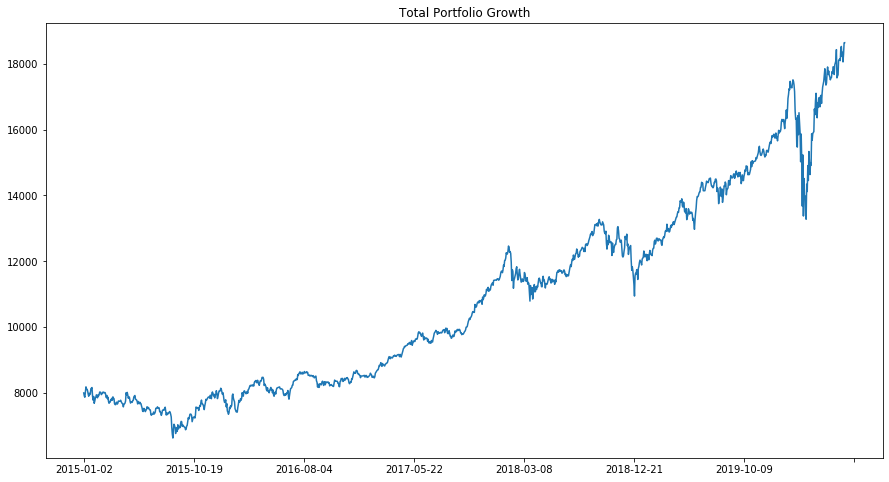

In [104]:
#Visualizing data
portfolio_dollar_value['Total'].plot(figsize=(15,8))
plt.title('Total Portfolio Growth')

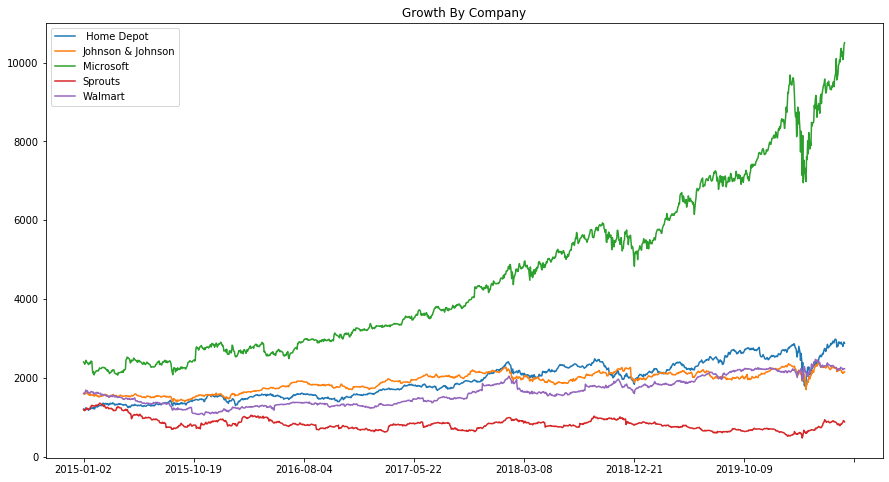

In [108]:
#Growth by individual companies
portfolio_dollar_value['Home Depot'].plot(figsize=(15,8), label  =' Home Depot')
portfolio_dollar_value['Johnson & Johnson'].plot(figsize=(15,8), label = 'Johnson & Johnson')
portfolio_dollar_value['Microsoft'].plot(figsize=(15,8), label = 'Microsoft')
portfolio_dollar_value['Sprouts'].plot(figsize=(15,8), label = 'Sprouts')
portfolio_dollar_value['Walmart'].plot(figsize=(15,8), label = 'Walmart')
plt.title('Growth By Company')
plt.legend(loc = 'upper left')

In [109]:
#Adding a column for the daily returns
#Using the pct_change is a shortcut from pandas. Calculates the percentage change using the previous row
portfolio_dollar_value['Daily Returns'] = portfolio_dollar_value['Total'].pct_change(1)

In [110]:
portfolio_dollar_value

,Home Depot,Johnson & Johnson,Microsoft,Sprouts,Walmart,Total,Daily Returns
2015-01-02,1200.000000,1600.000000,2400.000000,1200.000000,1600.000000,8000.000000,NaN
2015-01-05,1174.823552,1588.825105,2377.673225,1171.428571,1595.343423,7908.093876,-0.011488
2015-01-06,1171.226917,1581.017987,2343.028229,1166.490300,1607.636787,7869.400220,-0.004893
2015-01-07,1211.370009,1615.920398,2372.797263,1191.181658,1650.291036,8041.560363,0.021877
2015-01-08,1238.170743,1628.626100,2442.600513,1190.476190,1685.122235,8184.995783,0.017837
...,...,...,...,...,...,...,...
2020-06-25,2846.910954,2138.078837,10282.634731,854.673721,2229.755530,18352.053772,0.007054
2020-06-26,2796.209997,2109.605817,10076.817793,871.957672,2203.864959,18058.456238,-0.015998
2020-06-29,2855.496471,2128.434749,10185.115483,913.932981,2217.648428,18300.628113,0.013410
2020-06-30,2906.429469,2152.774589,10445.337896,902.645503,2231.059371,18638.246827,0.018448


In [112]:
#Calculating sharpe ratio for portfolio
avg_return = portfolio_dollar_value['Daily Returns'].mean()
sd = portfolio_dollar_value['Daily Returns'].std()
sharpe_ratio_daily = avg_return / sd

In [113]:
sharpe_ratio_daily

0.05528092969623808

In [118]:
#Annualizing sharpe ratio 
sharpe_ratio = sharpe_ratio_daily * np.sqrt(252)
sharpe_ratio

0.8775575533241482

# Monte Carlo Simulation 

In [132]:
#Creating a dataframe with just the closing price
HD_Price = HD['close']
JNJ_Price = JNJ['close']
MSFT_Price = MSFT['close']
SFM_Price = SFM['close']
WMT_Price = WMT['close']

price_dataframe = pd.concat([HD_Price, JNJ_Price, MSFT_Price, SFM_Price, WMT_Price], axis = 1)
price_dataframe.columns = ['HD','JNJ', 'MSFT', 'SFM', 'WMT']

In [133]:
price_dataframe

,HD,JNJ,MSFT,SFM,WMT
2015-01-02,103.43,104.52,46.760,34.02,85.90
2015-01-05,101.26,103.79,46.325,33.21,85.65
2015-01-06,100.95,103.28,45.650,33.07,86.31
2015-01-07,104.41,105.56,46.230,33.77,88.60
2015-01-08,106.72,106.39,47.590,33.75,90.47
...,...,...,...,...,...
2020-06-25,245.38,139.67,200.340,24.23,119.71
2020-06-26,241.01,137.81,196.330,24.72,118.32
2020-06-29,246.12,139.04,198.440,25.91,119.06
2020-06-30,250.51,140.63,203.510,25.59,119.78


In [134]:
#Getting log returns
log_returns = np.log(price_dataframe / price_dataframe.shift(1))
log_returns.head()

,HD,JNJ,MSFT,SFM,WMT
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.021204,-0.007009,-0.009346,-0.024098,-0.002915
2015-01-06,-0.003066,-0.004926,-0.014678,-0.004225,0.007676
2015-01-07,0.033700,0.021836,0.012625,0.020946,0.026186
2015-01-08,0.021883,0.007832,0.028994,-0.000592,0.020886


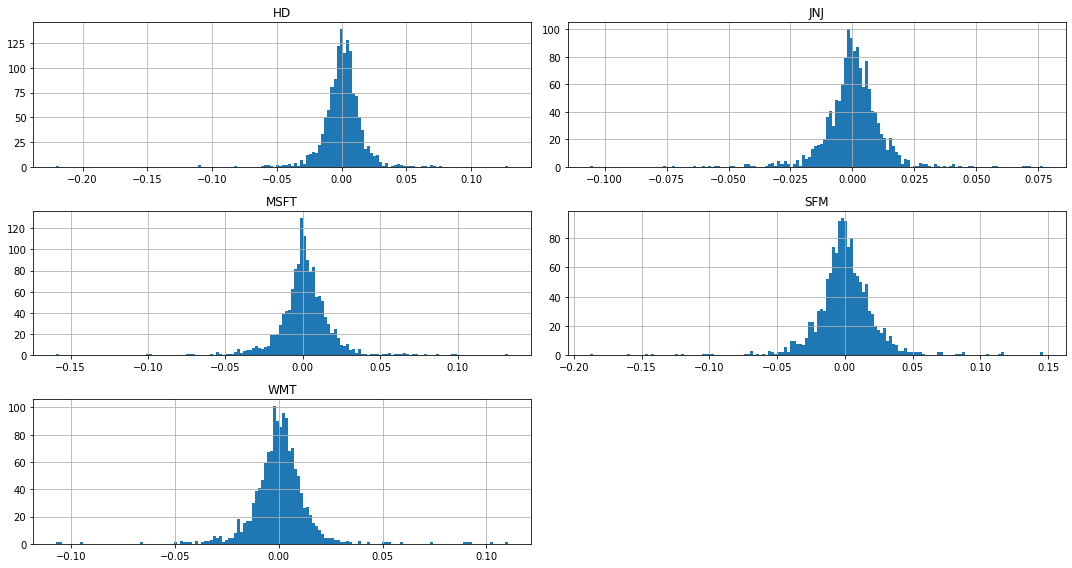

In [138]:
#Graphing returns as a histogram
log_returns.hist(bins = 150, figsize = (15,8))
plt.tight_layout()

In [154]:
#Testing the formulas for finding the sharpe ratio before the iterations

#Random weights
print('Random Weights Before Rebalance')
random_weights = np.array(np.random.random(5))
print(random_weights)
print('\n')

#The numbers randomly spawned don't sum to one so need to rebalance them
print('Rebalanced Weights')
random_weights = random_weights / np.sum(random_weights)
print(random_weights)
print('\n')

#Finding the expected return
print('Expected Returns')
expected_return = np.sum((log_returns.mean() * random_weights) * 252)
print(expected_return)
print('\n')

#Finding expected volatility
print('Expected Volatility')
expected_volatility = np.sqrt(np.dot(random_weights.T,np.dot(log_returns.cov()*252,random_weights)))
print(expected_volatility)
print('\n')

#Finding the sharpe ratio
print('Sharpe Ratio')
sharpe_ratio_simulation = expected_return / expected_volatility
print(sharpe_ratio_simulation)

Random Weights Before Rebalance
[0.19899827 0.28380676 0.88080342 0.90765743 0.74073991]


Rebalanced Weights
[0.06606836 0.09422517 0.29243085 0.30134651 0.24592911]


Expected Returns
0.09207028894063128


Expected Volatility
0.1983319626232756


Sharpe Ratio
0.46422315255113705
HD      0.000042
JNJ     0.000020
MSFT    0.000312
SFM    -0.000068
WMT     0.000059
dtype: float64


In [165]:
#Looping for numerous hypothetical portfolios
#First creating blank arrays that will hold all the values that we produce

portfolios = 20000

total_weights = np.zeros((portfolios,len(price_dataframe.columns)))
returns_array = np.zeros(portfolios)
volatility_array = np.zeros(portfolios)
sharpe_ratio_array = np.zeros(portfolios)

for char in range(portfolios):
    
    random_weights = np.array(np.random.random(5))

    random_weights = random_weights / np.sum(random_weights)
    
    total_weights[char,:] = random_weights

    returns_array[char] = np.sum((log_returns.mean() * random_weights) * 252)
    
    
    
    volatility_array[char] = np.sqrt(np.dot(random_weights.T,np.dot(log_returns.cov()*252,random_weights)))


    sharpe_ratio_array[char] = returns_array[char] / volatility_array[char]




In [182]:
#The location of the highest sharpe ratio
print(sharpe_ratio_array.max())
print(sharpe_ratio_array.argmax())

0.9415767819760394
10767


In [170]:
#The allocation that gives us the highest sharpe ratio
total_weights[10767,:]

array([0.07901445, 0.0375447 , 0.74753828, 0.00507277, 0.13082981])

Text(0, 0.5, 'Return')

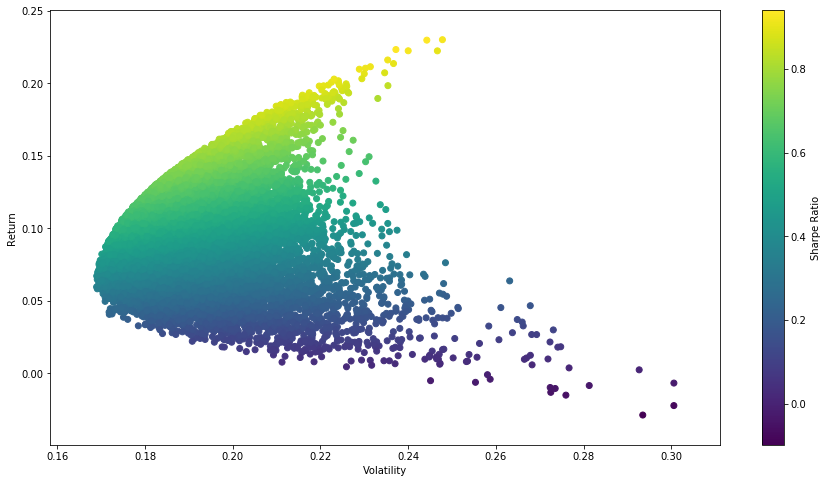

In [186]:
#Visualizing data
plt.figure(figsize=(15,8))
plt.scatter(volatility_array, returns_array, c = sharpe_ratio_array, cmap = 'viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')